### Display the input image and the resultant image side-by-side and provide suitable explanation for the changes you observe for multiple input images.

In [1]:
%matplotlib inline

import cv2
import numpy
from collections import Counter
from PIL import Image
from matplotlib import pyplot as plt
import math

In [2]:
img = './DIP_2019_A1/q2.png'
img = cv2.imread(img, 0)

In [3]:
def histEqualization(image):
    hist1 = cv2.calcHist([img],[0],None,[256],[0,256])
    
    cf = [0] * 256
    cf[0] = hist1[0][0]
    
    for i in range(1, 256):
        cf[i] = cf[i-1] + hist1[i][0]
        
    for i in range(0, 256):
        if hist1[i][0] == 0:
            cf[i] = 0
    
    for i in range(0, len(cf)):
        cf[i] = (cf[i]/img.size)*255
    
    for i in range(0, len(cf)):
        cf[i] = math.floor(cf[i])
        
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            for k in range(0, 256):
                if img[i][j] == k:
                    img[i][j] = cf[k]
                    break
    return img

In [4]:
img_r = histEqualization(img)

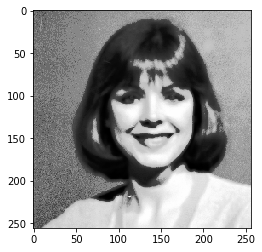

In [5]:
plt.imshow(img_r, cmap='gray')
plt.show() 

- Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.
- This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values.